<a href="https://colab.research.google.com/github/sweetyjunnarkar/Corona-tweet-sentiments/blob/main/Sweety_Junnarkar_Team_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

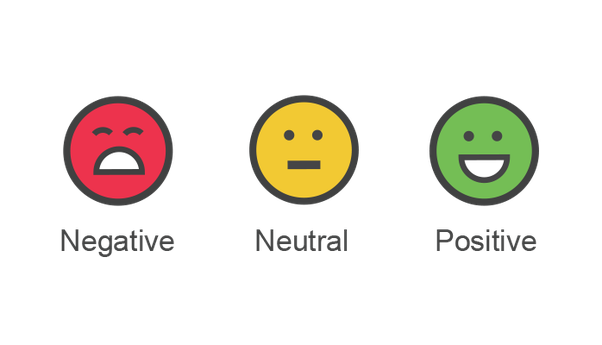

Along with the Coronavirus pandemic, another crisis has manifested itself in the form of mass fear and panic phenomena, fueled by incomplete and often inaccurate information. There is therefore a tremendous need to address and better understand COVID-19’s informational crisis and gauge public sentiment. In this research article, we identify public sentiment associated with the pandemic using Coronavirus specific Tweets.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing useful liabraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## **Data**


This data is having above 41000 rows and 6 columns.

In [3]:
working_file="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 1/Coronavirus Tweets.csv"

In [4]:
df = pd.read_csv(working_file,encoding = 'latin')

In [5]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


# Checking for null values

In [6]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

We can see that there are lots of null values in location column.

Let's analyze further:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


Lets see what we have in sentiments:

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


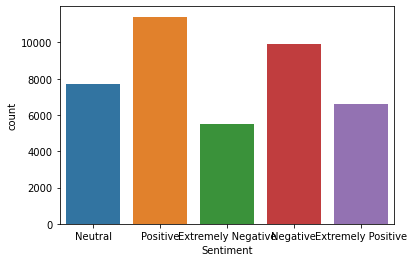

In [8]:
sns.countplot(df["Sentiment"])

We can see that we are having 5 classes in sentiments.

Lets go through the tweets of each sentiment:

In [9]:
df[df['Sentiment']=="Positive"].loc[3,"OriginalTweet"]

"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j"

We can see that the above tweet is positive because it is the positive thing happened due to corona. Or in this tweet we are seeing lot of positivity.

In [10]:
df[df['Sentiment']=="Extremely Positive"].loc[11,"OriginalTweet"]

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [11]:
df[df['Sentiment']=="Extremely Positive"].loc[41142,"OriginalTweet"]

'@MajangChien @MTNSSD @MTNSSD is worst than COVID-19. All businesses have reduced their prices but our MTN is looting us instead of giving us free data.'

In [12]:
df[df['Sentiment']=="Neutral"].loc[10,"OriginalTweet"]

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

We can see above that the above tweet doesn't make any sense with corona sentiment or we can say it is normal statement so it is neutral.

In [13]:
df[df['Sentiment']=="Neutral"].loc[16,"OriginalTweet"]

'????? ????? ????? ????? ??\r\r\n?????? ????? ??????? ????????? ?\r\r\n#????_???? ????? ???? ?????? ? #????????? ?????? ?? 13 ???? ?? ?? ???? ?????? ?? ??\r\r\n#???_???????? ????? ??? ???? ? https://t.co/51bL8P6vZh'

We can definitely relate why it is neutral...!!!

In [14]:
df[df['Sentiment']=="Extremely Negative"].loc[27,"OriginalTweet"]

'This morning I tested positive for Covid 19. I feel ok, I have no symptoms so far but have been isolated since I found out about my possible exposure to the virus.  Stay home people and be pragmatic. I will keep you updated on how IÂ\x92m doing ???? No panic. https://t.co/Lg7HVMZglZ'

In [15]:
df[df['Sentiment']=="Extremely Negative"].loc[41130,"OriginalTweet"]

'Squeo works in the meat department of a Kroger supermarket in Michigan. He knows of several grocery workers whoÂ\x92ve tested positive for COVID-19 and one in his area who died. He worries that the behavior of some shoppers is putting people in unnecessary danger.'

In [16]:
df[df['Sentiment']=="Negative"].loc[9,"OriginalTweet"]

"For corona prevention,we should stop to buy things with the cash and should use online payment methods because corona can spread through the notes. Also we should prefer online shopping from our home. It's time to fight against COVID 19?. #govindia #IndiaFightsCorona"

## We can't compare positive and extremelly positive or negative and extremely negative, so lets make them 1 column.

positive=extremely positive + positive

negative=extremely negative + negative

After that we can classify as negative=1,neutral=2,and positive=3

In [17]:
df['Ordinal_Sentiment'] = df['Sentiment'].replace({"Positive":3,'Negative':1,'Neutral':2,'Extremely Positive':3,'Extremely Negative':1})

In [18]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Ordinal_Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,2
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,1
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,3
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,2


Now analyzing three classes again.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


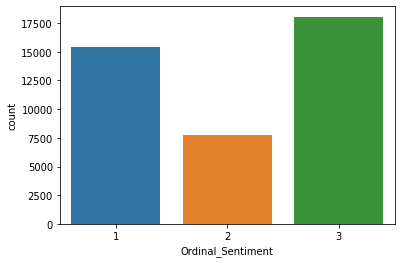

In [19]:
sns.countplot(df['Ordinal_Sentiment'])

Lets analyze other features:

We are having tweets of one month here.

In [20]:
df.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

We can see that most of the tweets are from the month march and april where corona just started spreding.

In [21]:
df[df['TweetAt']=='28-03-2020']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Ordinal_Sentiment
24948,28747,73699,Sydney,28-03-2020,.@Woolworths is set to expand its community sh...,Positive,3
24949,28748,73700,NaN,28-03-2020,@JackPosobiec Test kits with low accuracy but ...,Negative,1
24950,28749,73701,NaN,28-03-2020,"NSW, Australia. COVID-19 positive Chinese wom...",Extremely Positive,3
24951,28750,73702,"New Delhi, India",28-03-2020,1 A friend is helping with relief across India...,Extremely Positive,3
24952,28751,73703,"New Hampshire, USA",28-03-2020,My story about how grocery stores and their wo...,Negative,1
24953,28752,73704,A Hesse in MUC and CGN & DUS,28-03-2020,Protected shopping with my wife during the #Co...,Extremely Positive,3
24954,28753,73705,"Chesterfield, VA",28-03-2020,#Coronavirus: Italy becoming impatient with lo...,Extremely Negative,1
24955,28754,73706,RÃ©publique DÃ©mocratique Du Congo,28-03-2020,@mundaditob @marosephine @senatrdc @VoilaNight...,Extremely Positive,3
24956,28755,73707,Toronto,28-03-2020,So you want to limit trips to the grocery stor...,Positive,3
24957,28756,73708,"Victoria, Australia",28-03-2020,"When all this is over, IÂll never again take ...",Extremely Positive,3


In [22]:
df[df['TweetAt']=='30-03-2020']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Ordinal_Sentiment
25096,28895,73847,"England, United Kingdom",30-03-2020,"""Frontline staff work upto 14hrs""\r\r\n\r\r\n""...",Positive,3
25097,28896,73848,NaN,30-03-2020,"No matter what you talk about, the conversatio...",Extremely Negative,1
25098,28897,73849,"Adelaide, South Australia",30-03-2020,The @UN has been forced to issue a Âbattle pl...,Extremely Negative,1
25099,28898,73850,India,30-03-2020,#Covid2019 | Demand for existing residential s...,Negative,1
25100,28899,73851,NaN,30-03-2020,The supermarket is full of people It seems tha...,Positive,3
...,...,...,...,...,...,...,...
25178,28977,73929,NaN,30-03-2020,@MOPHQatar @MOI_QatarEn @ILQLive Limit the amo...,Extremely Positive,3
25179,28978,73930,Earth,30-03-2020,"@realDonaldTrump Why do you keep saying ""if yo...",Negative,1
25180,28979,73931,Jakarta,30-03-2020,You know shit is real when the supermarket is ...,Negative,1
25181,28980,73932,NaN,30-03-2020,At the best of times I canÂt stand anyone nea...,Extremely Positive,3


In [23]:
df['Location'].value_counts()

London                           540
United States                    528
London, England                  520
New York, NY                     395
Washington, DC                   373
                                ... 
California, North of the Wall      1
TitirilquÃ©n, Chile                1
Erie PA, USA                       1
Budgam, J&K                        1
portland                           1
Name: Location, Length: 12220, dtype: int64

In [24]:
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Ordinal_Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,2
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,1
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,3
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,2


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


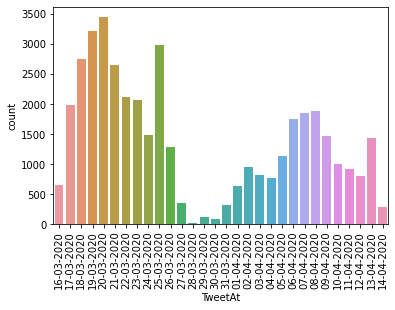

In [25]:
sns.countplot(df['TweetAt'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


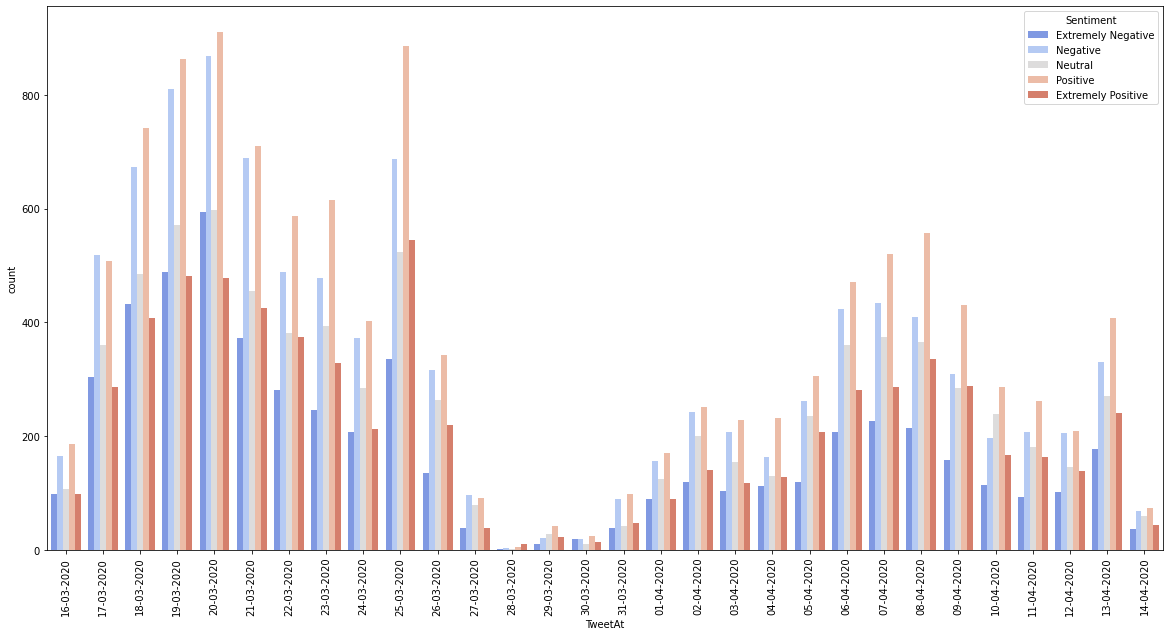

In [26]:
sns.countplot(df['TweetAt'],hue = df['Sentiment'],hue_order=[ 'Extremely Negative', 'Negative','Neutral', 'Positive','Extremely Positive'],palette = 'coolwarm')
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


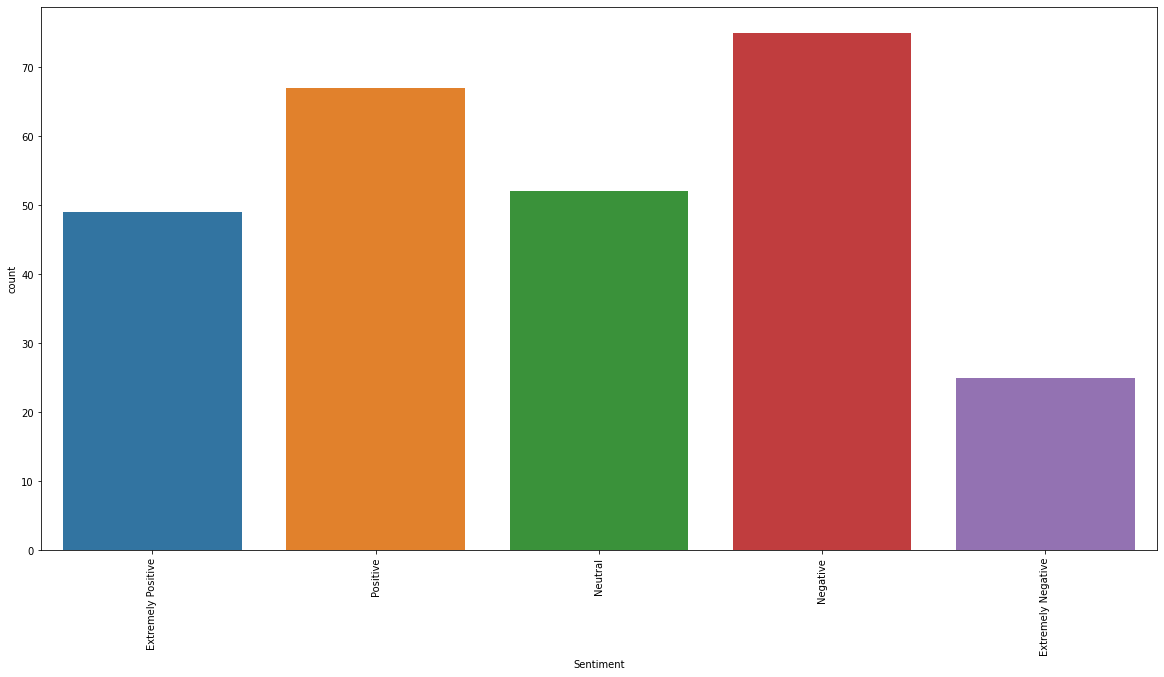

In [27]:
sns.countplot(df[df['Location']=="India"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (10,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


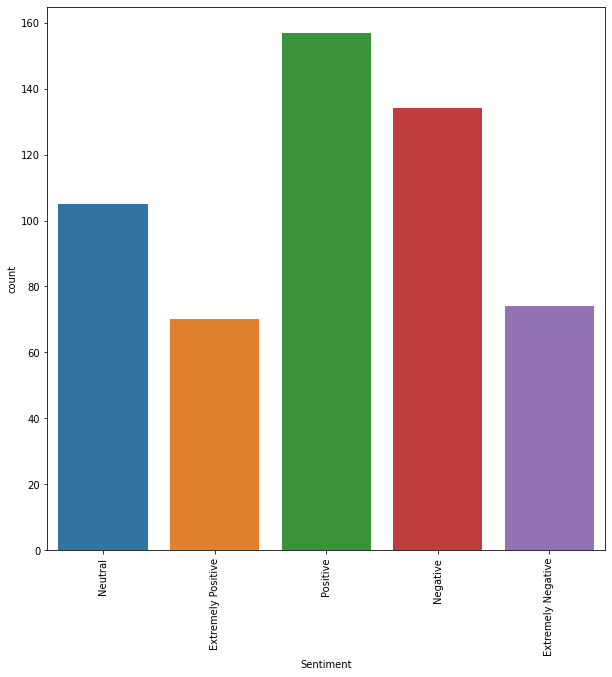

In [28]:
sns.countplot(df[df['Location']=="London"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


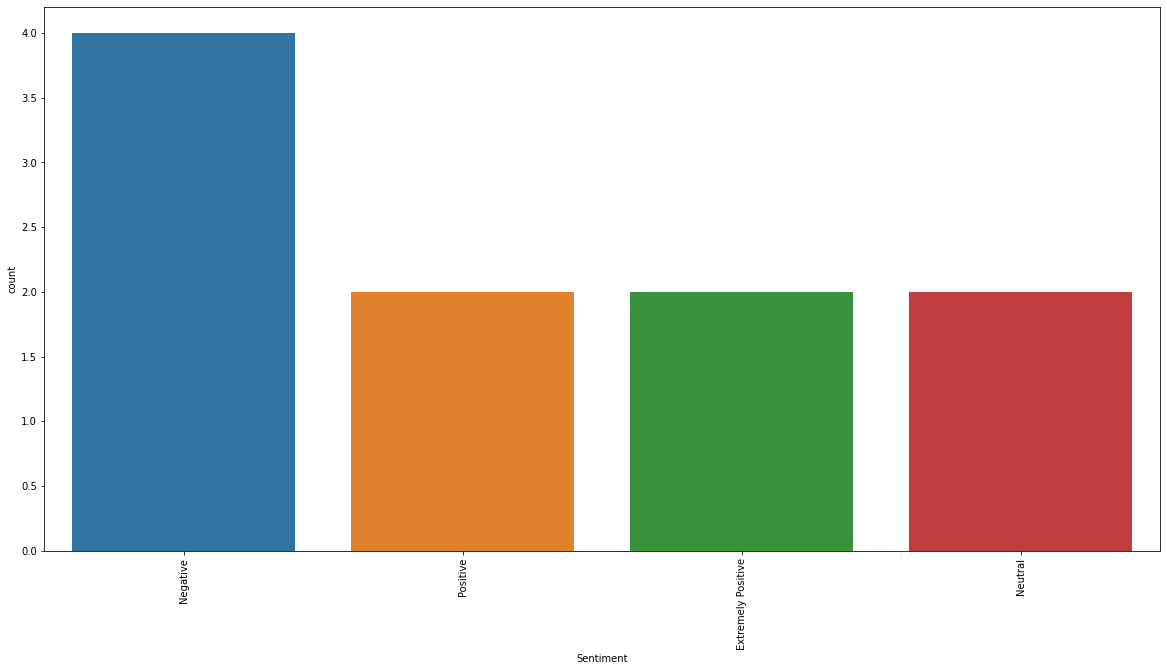

In [29]:
sns.countplot(df[df['Location']=="China"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


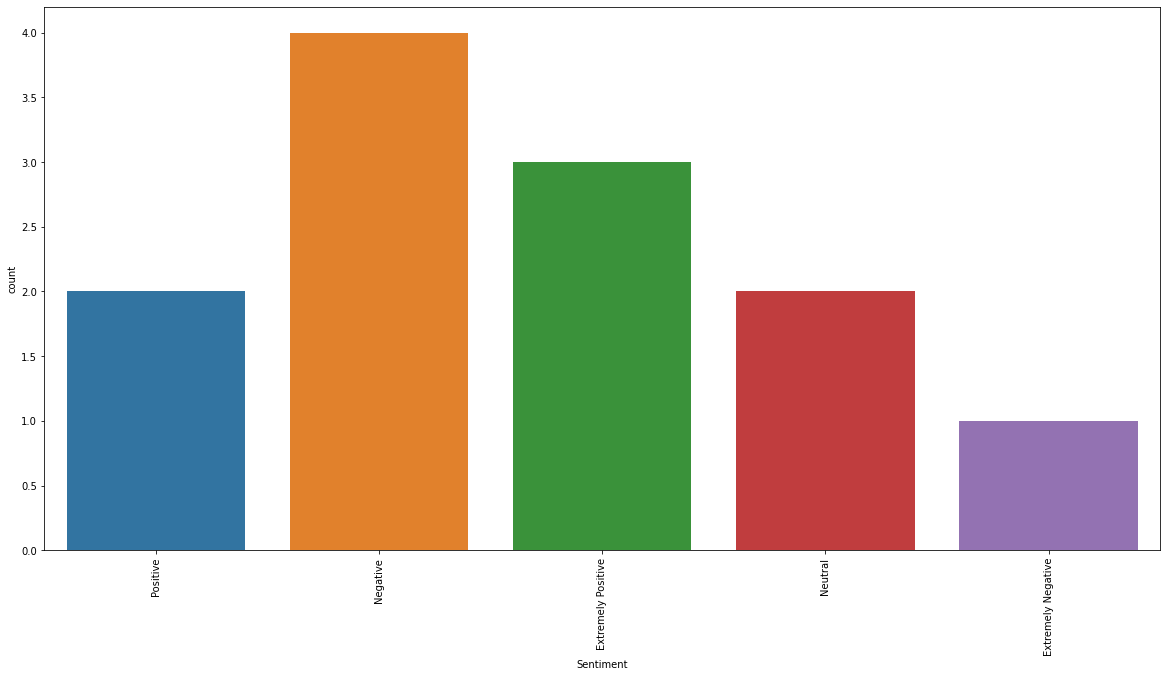

In [30]:
sns.countplot(df[df['Location']=="US"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


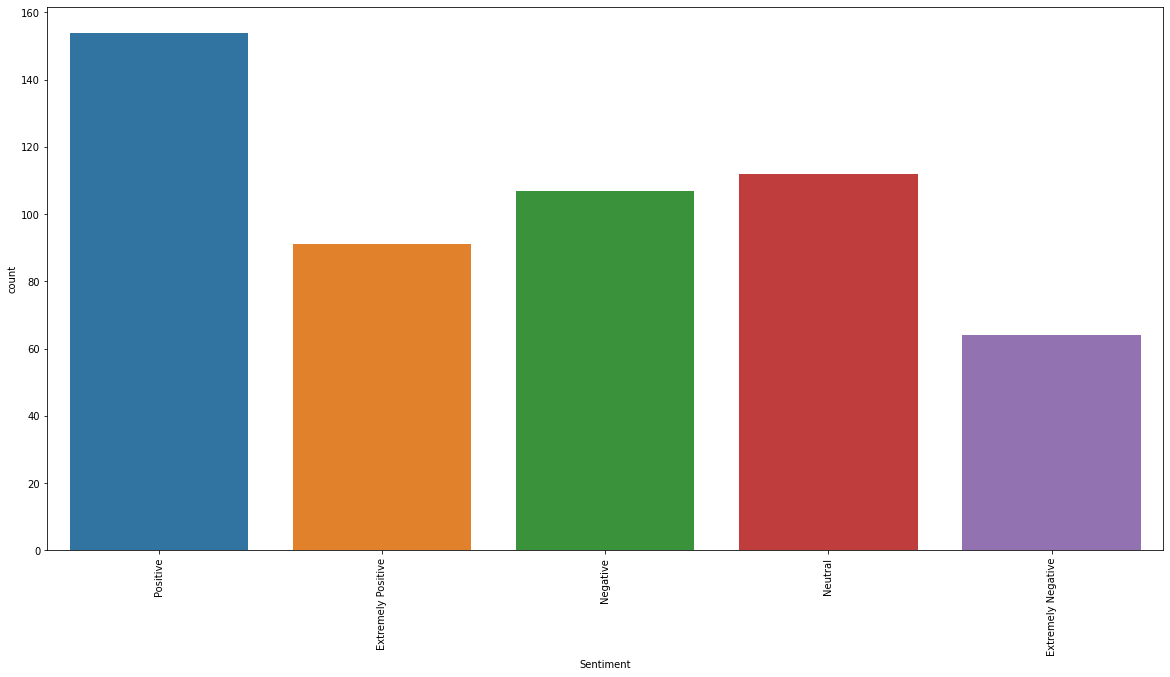

In [31]:
sns.countplot(df[df['Location']=="United States"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


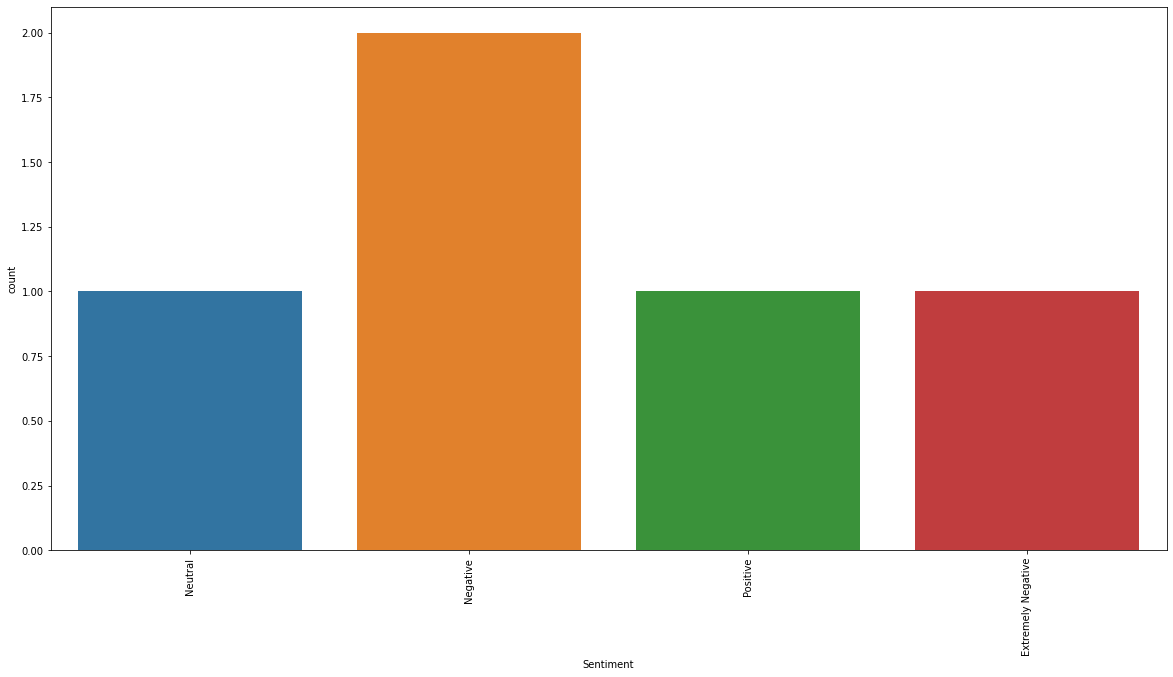

In [32]:
sns.countplot(df[df['Location']=="Austria"]['Sentiment'])
plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (20,10)

In [33]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment', 'Ordinal_Sentiment'],
      dtype='object')

In [34]:
df.shape

(41157, 7)

In [35]:
df.loc[np.random.randint(0,40000)]

UserName                                                         20647
ScreenName                                                       65599
Location                                                        Sydney
TweetAt                                                     23-03-2020
OriginalTweet        Coronavirus: Supermarket shoppers appear to be...
Sentiment                                           Extremely Positive
Ordinal_Sentiment                                                    3
Name: 16848, dtype: object

In [36]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Ordinal_Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,2
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,3
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,3
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,3
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,1


# **Tweets Preprocessing and Cleaning**

Take a look at the pictures below depicting two scenarios of an office space – one is untidy and the other is clean and organized. 

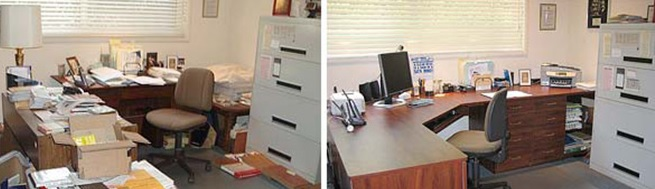

The preprocessing of the text data is an essential step as it makes the raw text ready for mining, i.e., it becomes easier to extract information from the text and apply machine learning algorithms to it. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

I get this tweet from one of the text data given in data through link in the data.

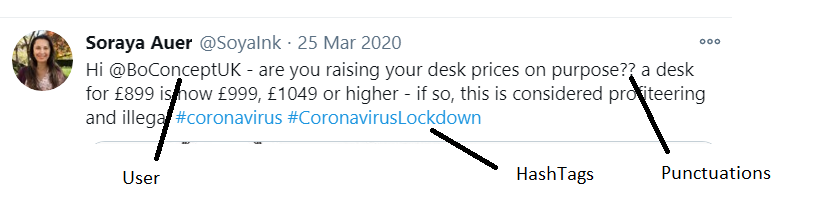

##**Removing User(@user)**

In [37]:
df['OriginalTweet'].iloc[22916]

'Hi @BoConceptUK - are you raising your desk prices on purpose?? a desk for Â£899 is now Â£999, Â£1049 or higher - if so, this is considered profiteering and illegal #coronavirus #CoronavirusLockdown https://t.co/xWpWhwCG5X'

In [38]:
def rm_user(tweet):
  a= []
  # sw = stopwords.words('english')
  for word in tweet.lower().split():
    if word.startswith('@'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [39]:
df['filtered_tweets']=df['OriginalTweet'].apply(rm_user)
df['filtered_tweets'].iloc[22916]

'hi - are you raising your desk prices on purpose?? a desk for â£899 is now â£999, â£1049 or higher - if so, this is considered profiteering and illegal #coronavirus #coronaviruslockdown https://t.co/xwpwhwcg5x'

## **Removing Hashtags**

In [40]:
def rm_tags(tweet):
  a= []
  for word in tweet.lower().split():
    if word.startswith('#'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [41]:
df['filtered_tweets']=df['filtered_tweets'].apply(rm_tags)
df['filtered_tweets'].iloc[22916]

'hi - are you raising your desk prices on purpose?? a desk for â£899 is now â£999, â£1049 or higher - if so, this is considered profiteering and illegal https://t.co/xwpwhwcg5x'

## **Removing Links**

In [42]:
def rm_links(tweet):
  a=[]
  for word in tweet.split():
    if word.startswith('https:') or word.startswith('http:'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [43]:
df['filtered_tweets']=df['filtered_tweets'].apply(rm_links)
df['filtered_tweets'].iloc[22916]

'hi - are you raising your desk prices on purpose?? a desk for â£899 is now â£999, â£1049 or higher - if so, this is considered profiteering and illegal'

## **Removing Punctuations**

In [44]:
pun = string.punctuation

In [45]:
pun

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def rem_pun(tweet):
  stri = ''
  for i in tweet:
    if i not in pun:
      stri+=i
    else:
      stri+=' '
  return stri

In [47]:
df['filtered_tweets']=df['filtered_tweets'].apply(rem_pun)
df['filtered_tweets'].iloc[22916]

'hi   are you raising your desk prices on purpose   a desk for â£899 is now â£999  â£1049 or higher   if so  this is considered profiteering and illegal'

## **Removing digits and special characters**

In [48]:
import re
def rm_dig(tweet):
  a=[]
  for word in tweet.split():
    output = re.sub('[â£/0-9]+', '', word)
    a.append(output)
  return ' '.join(a)

In [49]:
df['filtered_tweets']=df['filtered_tweets'].apply(rm_dig)
df['filtered_tweets'].iloc[22916]

'hi are you raising your desk prices on purpose a desk for  is now   or higher if so this is considered profiteering and illegal'

## **Stemming**

I have tried stemming but it just cutting end parts without observing words.

So I am not using it.

In [50]:
# from nltk.stem.porter import PorterStemmer

# stemmer = PorterStemmer()
# def stem_words(text):
#     return " ".join([stemmer.stem(word) for word in text.split()])

# df['filtered_tweets']=df['filtered_tweets'].apply(stem_words)
# df['filtered_tweets'].iloc[22916]

## **Removing Stopwords**

In [51]:
def rm_sw(tweet):
  a= []
  sw = stopwords.words('english')
  sw.append("hi")
  for word in tweet.lower().split():
    if word not in sw:
      a.append(word)
  return ' '.join(a)

In [52]:
df['filtered_tweets']=df['filtered_tweets'].apply(rm_sw)
df['filtered_tweets'].iloc[22916]

'raising desk prices purpose desk higher considered profiteering illegal'

## **Lemmatization**

In [53]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

In [54]:
df['filtered_tweets']=df['filtered_tweets'].apply(lemmatize_words)
df['filtered_tweets'].iloc[22916]

'raise desk price purpose desk high consider profiteering illegal'

## Removing suffixes from words if there are some words still having suffixes

In [55]:
def strip_ing(tweet):
  a=[]
  suffix="ing"
  for word in tweet.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

def strip_ly(tweet):
  a=[]
  suffix="ly"
  for word in tweet.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

def strip_es(tweet):
  a=[]
  suffix="es"
  for word in tweet.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)+1]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

def strip_ed(tweet):
  a=[]
  suffix="ed"
  for word in tweet.lower().split():
    if word.endswith(suffix):
      word=word[:-len(suffix)]
      a.append(word)
    elif not word.endswith(suffix):
      a.append(word)
  return " ".join(a)

In [56]:
df['filtered_tweets']=df['filtered_tweets'].apply(strip_ed).apply(strip_es).apply(strip_ly).apply(strip_ing)
df['filtered_tweets'].iloc[22916]

'raise desk price purpose desk high consider profiteer illegal'

## **converting chatwords**

In [57]:
chat_words_str = """
AFAIK=As Far As I Know
AFK=Away From Keyboard
ASAP=As Soon As Possible
ATK=At The Keyboard
ATM=At The Moment
A3=Anytime, Anywhere, Anyplace
BAK=Back At Keyboard
BBL=Be Back Later
BBS=Be Back Soon
BFN=Bye For Now
B4N=Bye For Now
BRB=Be Right Back
BRT=Be Right There
BTW=By The Way
B4=Before
B4N=Bye For Now
CU=See You
CUL8R=See You Later
CYA=See You
FAQ=Frequently Asked Questions
FC=Fingers Crossed
FWIW=For What It's Worth
FYI=For Your Information
GAL=Get A Life
GG=Good Game
GN=Good Night
GMTA=Great Minds Think Alike
GR8=Great!
G9=Genius
IC=I See
ICQ=I Seek you (also a chat program)
ILU=ILU: I Love You
IMHO=In My Honest/Humble Opinion
IMO=In My Opinion
IOW=In Other Words
IRL=In Real Life
KISS=Keep It Simple, Stupid
LDR=Long Distance Relationship
LMAO=Laugh My A.. Off
LOL=Laughing Out Loud
LTNS=Long Time No See
L8R=Later
MTE=My Thoughts Exactly
M8=Mate
NRN=No Reply Necessary
OIC=Oh I See
PITA=Pain In The A..
PRT=Party
PRW=Parents Are Watching
ROFL=Rolling On The Floor Laughing
ROFLOL=Rolling On The Floor Laughing Out Loud
ROTFLMAO=Rolling On The Floor Laughing My A.. Off
SK8=Skate
STATS=Your sex and age
ASL=Age, Sex, Location
THX=Thank You
TTFN=Ta-Ta For Now!
TTYL=Talk To You Later
U=You
U2=You Too
U4E=Yours For Ever
WB=Welcome Back
WTF=What The F...
WTG=Way To Go!
WUF=Where Are You From?
W8=Wait...
7K=Sick:-D Laugher
"""

In [58]:
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def tweet_words_conversion(tweet):
    new_text = []
    for w in tweet.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [59]:
df['filtered_tweets']=df['filtered_tweets'].apply(tweet_words_conversion)
df['filtered_tweets'].iloc[22916]

'raise desk price purpose desk high consider profiteer illegal'

## analyzing hashtags

In [60]:
def get_tags(tweet):
  stri = ''
  for word in tweet.lower().split():
    if word.startswith("#"):
      stri+=word[1:]+','
  return stri[:-1]

In [61]:
df['hashtags'] = df['OriginalTweet'].apply(get_tags)

In [62]:
df["OriginalTweet"].iloc[25]

"UK #consumer poll indicates the majority expect #covid19's impact to last 4-12 months (at 12 March). We expect this to increase at the next #tracker... See full results of the @RetailX Coronavirus Consumer Confidence Tracker here: https://t.co/K3uJlcjqDB https://t.co/9G3kgqIXJ8"

In [63]:
df['filtered_tweets'].iloc[25]

'uk poll indicate majority expect impact last month march expect increase next see full result coronavirus consumer confidence tracker'

In [64]:
df['hashtags'].iloc[6]

'covid_19'

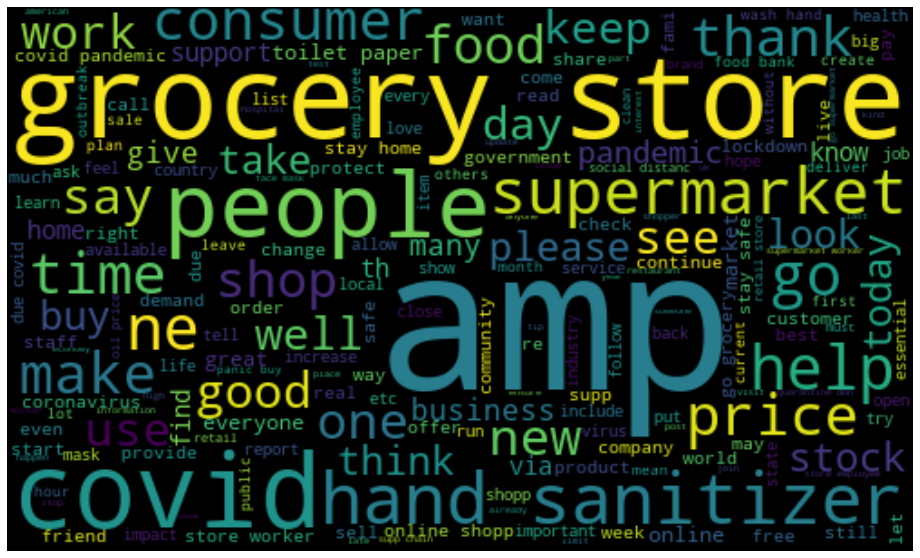

In [65]:
allWords = ' '.join([twts for twts in df['filtered_tweets'][df['Ordinal_Sentiment']==3]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

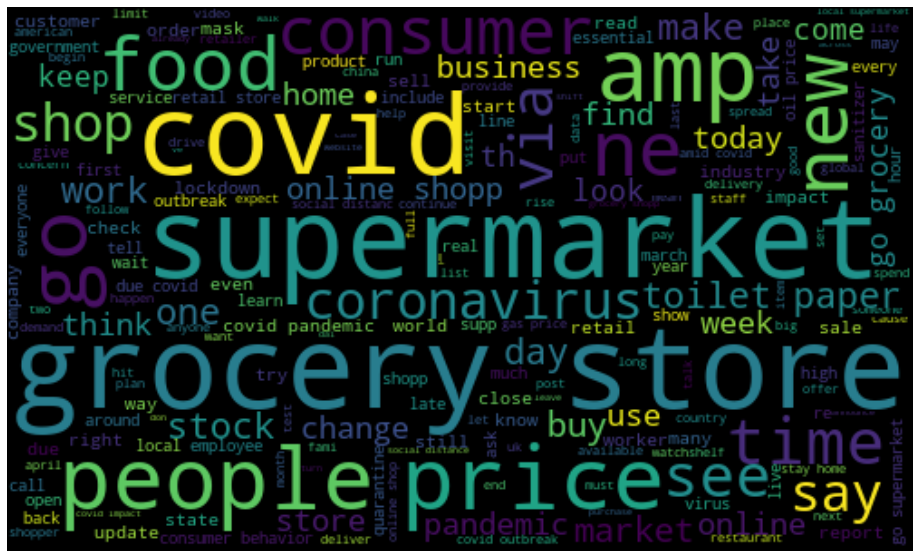

In [66]:
allWords = ' '.join([twts for twts in df['filtered_tweets'][df['Ordinal_Sentiment']==2]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

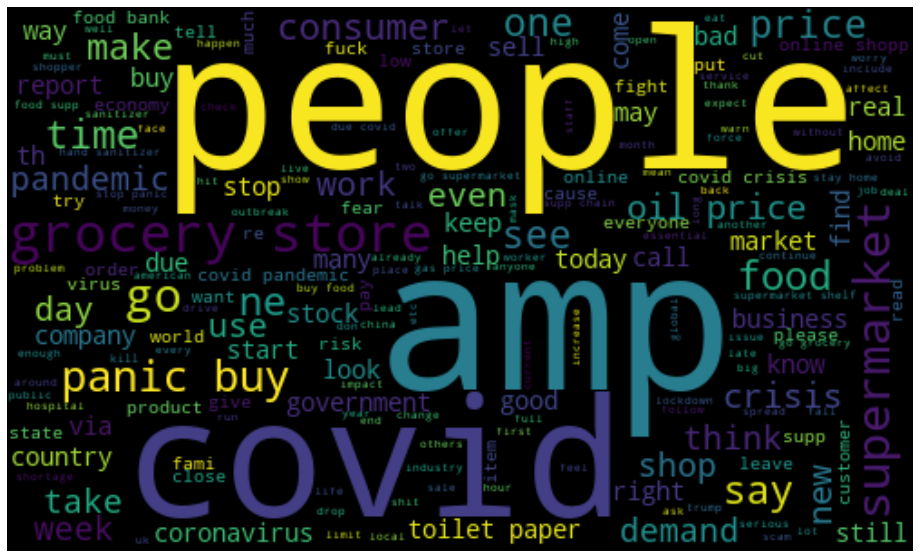

In [67]:
allWords = ' '.join([twts for twts in df['filtered_tweets'][df['Ordinal_Sentiment']==1]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [68]:
df.loc[37029]

UserName                                                         40828
ScreenName                                                       85780
Location                                                  New York, NY
TweetAt                                                     10-04-2020
OriginalTweet        This piece from @reuters talks about inflation...
Sentiment                                           Extremely Negative
Ordinal_Sentiment                                                    1
filtered_tweets      piece talk inflation overall component risk su...
hashtags                                                  coronavirus.
Name: 37029, dtype: object

In [69]:
r = np.random.randint(0,40000)
a,b,c= df.loc[r,['filtered_tweets','hashtags','OriginalTweet']]

In [70]:
print(f'ft:{a}\nHashtags:{b}\nOT:{c}')

ft:sad th watch elder couple supermarket go shelf shelf try find someth find impossible mention leave behind unnecessari high price
Hashtags:coronavirus,prices
OT:The saddest thing was to watch an elderly couple in the supermarket going from shelf to shelf trying to find something and finding it impossible. Not to mention what was left behind was unnecessarily highly priced #coronavirus #prices ????


In [71]:
df['hashtags'].value_counts()

                                                                                                                                   17541
coronavirus                                                                                                                         2991
covid_19                                                                                                                             668
covid2019                                                                                                                            391
coronavirus,covid19                                                                                                                  308
                                                                                                                                   ...  
panicbuying,covid2019,covid19southafrica,coronavirussouthafrica,coronaviruschallenge                                                   1
life,coronavirus                         

## Spitting Our Dataset into Training And Testing Dataset ( For Multiclass Classification)

In [74]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (32925, 9)
valid shape :  (8232, 9)


#Use Of Counter Vectorizer For Multi Class Classification

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.filtered_tweets.values)
X_valid = vectorizer.transform(valid.filtered_tweets.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (32925, 23451)
X_train.shape :  (8232, 23451)
y_train.shape :  (32925,)
y_valid.shape :  (8232,)


## Naive Bayes Classifier for MULTICLASS Classification

In [77]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.6959453302961276
Validation accuracy Score :  0.48627308066083574
                    precision    recall  f1-score   support

Extremely Negative       0.42      0.57      0.49       820
Extremely Positive       0.45      0.59      0.51      1025
          Negative       0.52      0.44      0.48      2345
           Neutral       0.33      0.68      0.44       745
          Positive       0.61      0.42      0.50      3297

          accuracy                           0.49      8232
         macro avg       0.47      0.54      0.48      8232
      weighted avg       0.52      0.49      0.49      8232



## Stochastic Gradient Descent-SGD Classifier( MULTICLASS CLASSIFICATION)

In [78]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.8277296886864085
Validation accuracy Score :  0.5826044703595724
                    precision    recall  f1-score   support

Extremely Negative       0.70      0.60      0.65      1262
Extremely Positive       0.73      0.65      0.69      1495
          Negative       0.43      0.52      0.47      1634
           Neutral       0.80      0.59      0.68      2079
          Positive       0.43      0.55      0.48      1762

          accuracy                           0.58      8232
         macro avg       0.62      0.58      0.59      8232
      weighted avg       0.62      0.58      0.59      8232



# RANDOM FOREST CLASSIFIER (For Multiclass Classification)

In [79]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9997266514806378
Validation accuracy Score :  0.5792031098153547
                    precision    recall  f1-score   support

Extremely Negative       0.37      0.67      0.48       601
Extremely Positive       0.36      0.74      0.49       645
          Negative       0.55      0.52      0.54      2104
           Neutral       0.81      0.64      0.72      1935
          Positive       0.67      0.52      0.59      2947

          accuracy                           0.58      8232
         macro avg       0.55      0.62      0.56      8232
      weighted avg       0.63      0.58      0.59      8232



# Extreme Gradient Boosting ( For Multiclass Classification)

In [ ]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.5047835990888383
Validation accuracy Score :  0.4868804664723032
                    precision    recall  f1-score   support

Extremely Negative       0.39      0.63      0.48       677
Extremely Positive       0.41      0.66      0.51       825
          Negative       0.38      0.49      0.43      1561
           Neutral       0.60      0.47      0.53      1974
          Positive       0.59      0.42      0.49      3195

          accuracy                           0.49      8232
         macro avg       0.48      0.53      0.49      8232
      weighted avg       0.52      0.49      0.49      8232



# Support vector machine( For Multiclass Classification)

In [ ]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.8993773728170084
Validation accuracy Score :  0.6072643343051506
                    precision    recall  f1-score   support

Extremely Negative       0.48      0.71      0.57       738
Extremely Positive       0.53      0.78      0.63       902
          Negative       0.58      0.55      0.56      2082
           Neutral       0.71      0.64      0.67      1718
          Positive       0.67      0.55      0.61      2792

          accuracy                           0.61      8232
         macro avg       0.59      0.65      0.61      8232
      weighted avg       0.62      0.61      0.61      8232



# Logistic Regression(For Multiclass Classification)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.8860744115413819
Validation accuracy Score :  0.6179543245869776
                    precision    recall  f1-score   support

Extremely Negative       0.62      0.68      0.65       999
Extremely Positive       0.62      0.71      0.66      1147
          Negative       0.54      0.56      0.55      1896
           Neutral       0.72      0.64      0.68      1744
          Positive       0.62      0.58      0.59      2446

          accuracy                           0.62      8232
         macro avg       0.62      0.63      0.63      8232
      weighted avg       0.62      0.62      0.62      8232



# CATBOOST MODEL (For Multiclass Classification)

In [96]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 65.8MB 58kB/s 
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [97]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [ ]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [ ]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.6703720577069097
Validation accuracy Score :  0.6203838678328474
                    precision    recall  f1-score   support

Extremely Negative       0.54      0.70      0.61       843
Extremely Positive       0.56      0.76      0.65       974
          Negative       0.53      0.58      0.56      1813
           Neutral       0.81      0.60      0.69      2058
          Positive       0.64      0.58      0.61      2544

          accuracy                           0.62      8232
         macro avg       0.62      0.65      0.62      8232
      weighted avg       0.64      0.62      0.62      8232



# All the multiclass models test accuracy in descending order

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
6,CatBoost,0.620384
1,Logistic Regression,0.617954
0,Support Vector Machines,0.607264
4,Stochastic Gradient Decent,0.572643
2,Random Forest,0.565962
5,XGBoost,0.486880
3,Naive Bayes,0.479470


#  **CONVRTING OUR MULTICLASS CLASSIFICATION INTO BINARY CLASSIFICATION**

In [80]:
new_df = df[['filtered_tweets','Sentiment']]

In [81]:
new_df.head()

,filtered_tweets,Sentiment
0,,Neutral
1,advice talk neighbour fami exchange phone numb...,Positive
2,coronavirus australia woolworths give elder di...,Positive
3,food stock one empty please panic enough food ...,Positive
4,ready go supermarket outbreak paranoid food st...,Extremely Negative


In [84]:
new_df=new_df[new_df['Sentiment']!="Neutral"]

In [85]:
X = new_df.drop('Sentiment', axis=1)
y = new_df.Sentiment

In [87]:
new_df["Sentiment"]= new_df["Sentiment"].replace('Positive',1) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Extremely Positive',1) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Negative',0) 
new_df["Sentiment"]= new_df["Sentiment"].replace('Extremely Negative',0) 

In [88]:
new_df.head()

,filtered_tweets,Sentiment
1,advice talk neighbour fami exchange phone numb...,1
2,coronavirus australia woolworths give elder di...,1
3,food stock one empty please panic enough food ...,1
4,ready go supermarket outbreak paranoid food st...,0
5,news regions first confirm covid case come su...,1


## DIVIDING OUR DATASET INTO TRAINING AND TESTING

In [89]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(new_df,test_size = 0.2,random_state=0,stratify = new_df.Sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (26755, 2)
valid shape :  (6689, 2)


# USING COUNT VECTORIZER

In [90]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.filtered_tweets.values)
X_valid = vectorizer.transform(valid.filtered_tweets.values)

y_train = train.Sentiment.values
y_valid = valid.Sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (26755, 21341)
X_train.shape :  (6689, 21341)
y_train.shape :  (26755,)
y_valid.shape :  (6689,)


# NAIVE BAYES CLASSIFIER FOR BINARY CLASSIFICATION.

In [91]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.8738553541394132
Validation accuracy Score :  0.8129765286290925
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      3015
           1       0.84      0.82      0.83      3674

    accuracy                           0.81      6689
   macro avg       0.81      0.81      0.81      6689
weighted avg       0.81      0.81      0.81      6689



# RANDOM FOREST CLASSIFIER FOR BINARY CLASSIFICATION

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train,y_train)

rf_prediction = rf_clf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(X_train,y_train))
print("Validation accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_valid))

Training accuracy Score    :  0.9999252476172678
Validation accuracy Score :  0.842577365824488
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      2957
           1       0.87      0.84      0.86      3732

    accuracy                           0.84      6689
   macro avg       0.84      0.84      0.84      6689
weighted avg       0.84      0.84      0.84      6689



# LOGISTIC REGRESSION(BINARY CLASSIFICATION)

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

Training accuracy Score    :  0.9572416370771818
Validation accuracy Score :  0.8804006577963821
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3062
           1       0.89      0.89      0.89      3627

    accuracy                           0.88      6689
   macro avg       0.88      0.88      0.88      6689
weighted avg       0.88      0.88      0.88      6689



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# CATBOOST ALGORITHM FOR BINARY CLASSIFICATION

In [98]:
clf2 = CatBoostClassifier()


clf2.fit(X_train, y_train,  
        eval_set=(X_valid, y_valid), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf2.is_fitted()))
print('CatBoost model parameters:')
print(clf2.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{}


In [101]:
catboost_prediction = clf2.predict(X_valid)
catboost_accuracy = accuracy_score(y_valid,catboost_prediction)
print("Training accuracy Score    : ",clf2.score(X_train,y_train))
print("Validation accuracy Score : ",catboost_accuracy )
print(classification_report(catboost_prediction,y_valid))

Training accuracy Score    :  0.9099607549990656
Validation accuracy Score :  0.8741216923306921
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2996
           1       0.89      0.87      0.88      3693

    accuracy                           0.87      6689
   macro avg       0.87      0.87      0.87      6689
weighted avg       0.87      0.87      0.87      6689



# XG BOOST( BINARY CLASSIFICATION)

In [99]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train, y_train)

xgb_prediction = xgboost_clf.predict(X_valid)
xgb_accuracy = accuracy_score(y_valid,xgb_prediction)
print("Training accuracy Score    : ",xgboost_clf.score(X_train,y_train))
print("Validation accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_valid))

Training accuracy Score    :  0.7562324799102972
Validation accuracy Score :  0.7543728509493198
              precision    recall  f1-score   support

           0       0.62      0.80      0.70      2403
           1       0.87      0.73      0.79      4286

    accuracy                           0.75      6689
   macro avg       0.74      0.76      0.75      6689
weighted avg       0.78      0.75      0.76      6689



# SUPPORT VECTOR MACHINE(BINARY CLASSIFICATION)

In [100]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

svc_prediction = svc.predict(X_valid)
svc_accuracy = accuracy_score(y_valid,svc_prediction)
print("Training accuracy Score    : ",svc.score(X_train,y_train))
print("Validation accuracy Score : ",svc_accuracy )
print(classification_report(svc_prediction,y_valid))

Training accuracy Score    :  0.9740982993832928
Validation accuracy Score :  0.8621617581103304
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2994
           1       0.88      0.86      0.87      3695

    accuracy                           0.86      6689
   macro avg       0.86      0.86      0.86      6689
weighted avg       0.86      0.86      0.86      6689



# Stochastic Gradient Descent-SGD Classifier( BINARY CLASSIFICATION)

In [103]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_valid)
sgd_accuracy = accuracy_score(y_valid,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_valid))

Training accuracy Score    :  0.956942627546253
Validation accuracy Score :  0.8786066676633278
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3010
           1       0.90      0.88      0.89      3679

    accuracy                           0.88      6689
   macro avg       0.88      0.88      0.88      6689
weighted avg       0.88      0.88      0.88      6689



In [104]:
# Get the predicted classes
train_class_preds = sgd_clf.predict(X_train)
test_class_preds = sgd_clf.predict(X_valid)

[[11672   646]
 [  506 13931]]


[Text(0, 0.5, 'Negative'), Text(0, 1.5, 'Positive')]

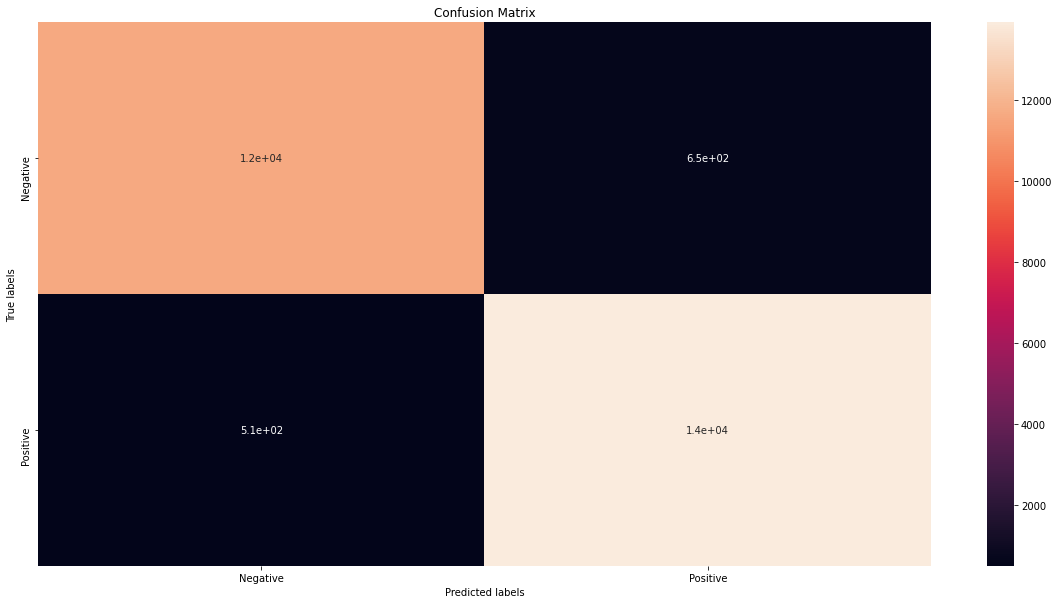

In [105]:
# Get the confusion matrix for both train and test. We are getting very low type and type 2 errors.

labels = ['Negative', 'Positive']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [106]:
# Let's check the overall accuracy. Overall accuracy is very good.
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

y_pred = sgd_clf.predict(X_valid)

score =accuracy_score(y_valid,y_pred)
print('accuracy is', score)

accuracy is 0.8786066676633278


In [107]:
# F1 score for our classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


y_pred =  sgd_clf.predict(X_valid)
print(f1_score(y_valid,y_pred, average="macro"))

0.8776253201609953


In [108]:
#score is mean accuracy
scikit_score = sgd_clf.score(X_valid,y_valid)
print('scikit score:', scikit_score)

scikit score: 0.8786066676633278


In [109]:
# Recall score for our winner model
recall_score(y_valid, y_pred, average='macro')

0.8770098113302602

In [110]:
# Classification Report for our stochastic gradient descent algorithm
classification_report(y_valid,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.86      0.87      3080\n           1       0.88      0.90      0.89      3609\n\n    accuracy                           0.88      6689\n   macro avg       0.88      0.88      0.88      6689\nweighted avg       0.88      0.88      0.88      6689\n'

In [111]:
# Very low type 1 and type 2 error
confusion_matrix(y_valid,y_pred)

array([[2639,  441],
       [ 371, 3238]])

# EVALUATION OF ALL BINARY CLASSIFICATION MODELS

**All the model test accuracy by descending order**

In [112]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'XGBoost','CatBoost'],
    'Test accuracy': [svc_accuracy, logreg_accuracy, 
              rf_accuracy, NB_accuracy, 
              sgd_accuracy, xgb_accuracy,catboost_accuracy]})

models.sort_values(by='Test accuracy', ascending=False)

,Model,Test accuracy
1,Logistic Regression,0.880401
4,Stochastic Gradient Decent,0.878607
6,CatBoost,0.874122
0,Support Vector Machines,0.862162
2,Random Forest,0.842577
3,Naive Bayes,0.812977
5,XGBoost,0.754373
